<a href="https://colab.research.google.com/github/Pradeep-prusty/Global-Terrorism-Analysis/blob/main/Global_terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#Mounting Google Drive

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# let's imort the dataset
df = pd.read_csv("/content/drive/MyDrive/Global_terrorism analysis/Global_Terrorism_Data.csv",encoding='latin-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  1.970000e+11   1970       7     2        NaN         0        NaN       58   
1  1.970000e+11   1970       0     0        NaN         0        NaN      130   
2  1.970010e+11   1970       1     0        NaN         0        NaN      160   
3  1.970010e+11   1970       1     0        NaN         0        NaN       78   
4  1.970010e+11   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

In [6]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [7]:
# let's rename the columns 
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [8]:
# removing extra columns
df=df[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [9]:
df.head()

Year  Month  Day             Country    state                       Region  \
0  1970      7    2  Dominican Republic      NaN  Central America & Caribbean   
1  1970      0    0              Mexico  Federal                North America   
2  1970      1    0         Philippines   Tarlac               Southeast Asia   
3  1970      1    0              Greece   Attica               Western Europe   
4  1970      1    0               Japan  Fukouka                    East Asia   

            city   latitude   longitude                      AttackType  \
0  Santo Domingo  18.456792  -69.951164                   Assassination   
1    Mexico city  19.371887  -99.086624     Hostage Taking (Kidnapping)   
2        Unknown  15.478598  120.599741                   Assassination   
3         Athens  37.997490   23.762728               Bombing/Explosion   
4        Fukouka  33.580412  130.396361  Facility/Infrastructure Attack   

   Killed  Wounded                   Target Summary  \
0     1.0      0.0             Julio Guzman     NaN   
1     0.0      0.0  Nadine Chaval, daughter     NaN   
2     1.0      0.0                 Employee     NaN   
3     NaN      NaN             U.S. Embassy     NaN   
4     NaN      NaN           U.S. Consulate     NaN   

                                Group                  Target_type  \
0                              MANO-D  Private Citizens & Property   
1  23rd of September Communist League      Government (Diplomatic)   
2                             Unknown          Journalists & Media   
3                             Unknown      Government (Diplomatic)   
4                             Unknown      Government (Diplomatic)   

  Weapon_type Motive  
0     Unknown    NaN  
1     Unknown    NaN  
2     Unknown    NaN  
3  Explosives    NaN  
4  Incendiary    NaN

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3e7b712dd0>,
      dtype=object)

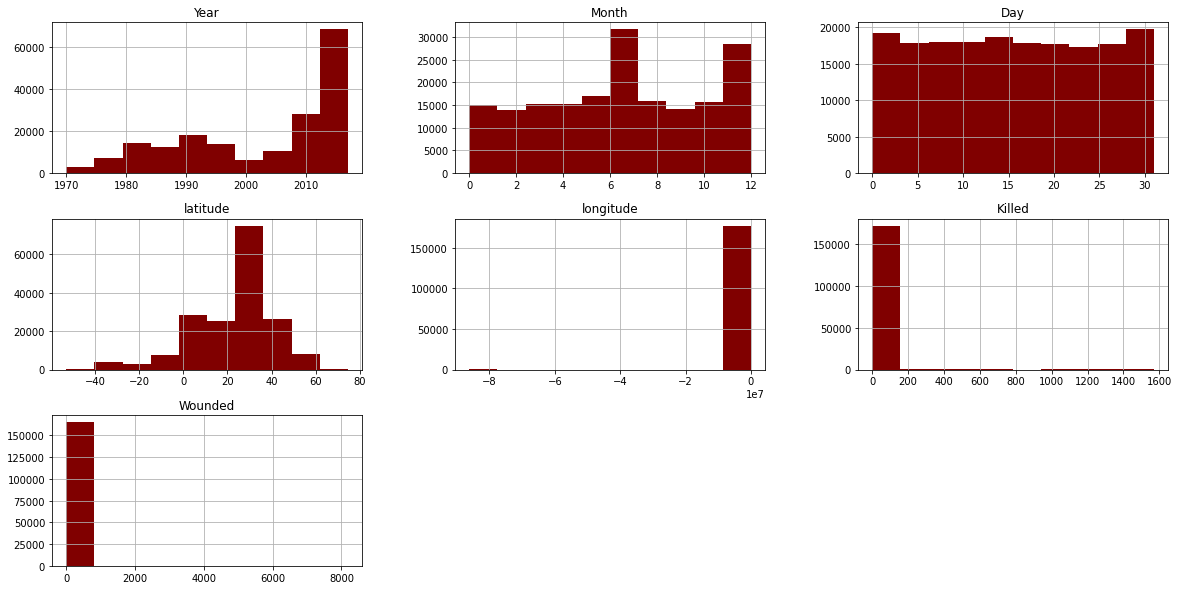

In [11]:
df.hist(figsize=(20,10),color="#800000")  # This represents  the distribution of data  on each series in the DataFrame.
                                          # We can use color code also

# <center><u>Number of Terror Attack each year

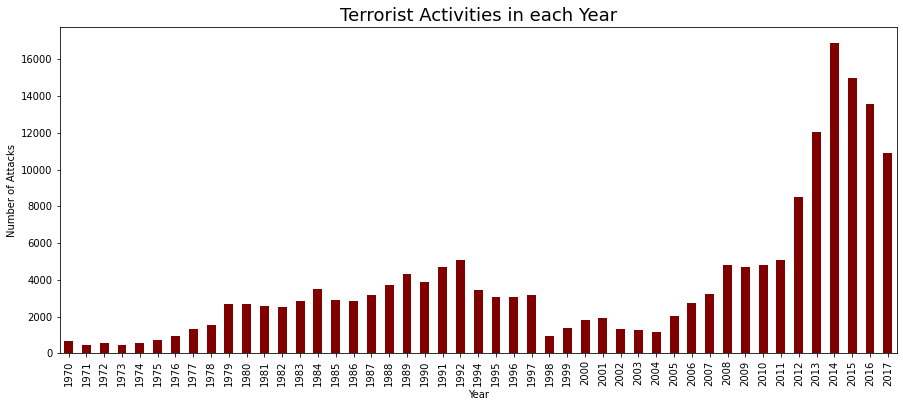

In [12]:
df.groupby("Year")["Year"].count().plot(kind="bar",figsize=(15,6),color="#800000")
plt.title('Terrorist Activities in each Year',fontsize=18)
plt.ylabel('Number of Attacks')
plt.show()

### Year 2014,2015 & 2016 have heighest number of attacks

# <center><u> Terrorist Activities by Region in each Year

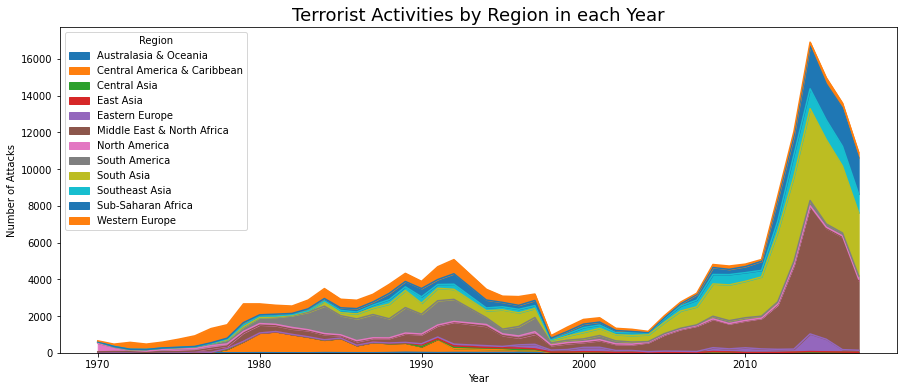

In [13]:
df.groupby(["Year","Region"])["Year"].count().unstack().fillna(0).astype(int).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year',fontsize=18)
plt.ylabel('Number of Attacks')
plt.show()

## <center><u> OR

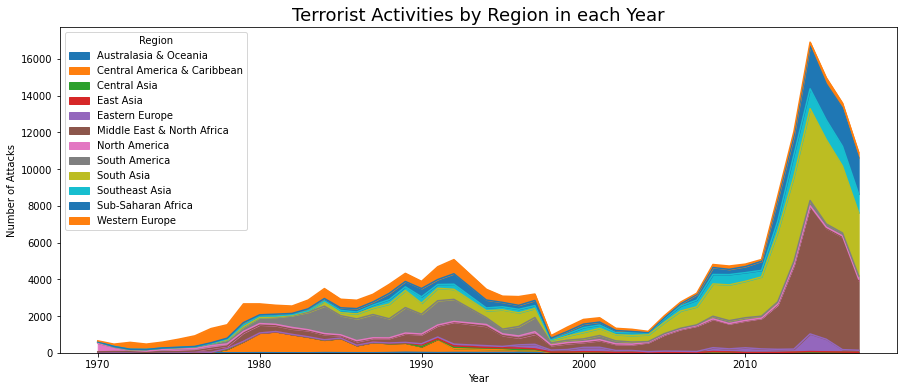

In [14]:
# we can use {{   df.groupby(["Year","Region"])["Year"].count().unstack().fillna(0).astype(int)   }} this code for calculate the terror activity by region
# but pd.crosstab will do same 
pd.crosstab(df.Year, df.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year',fontsize=18)
plt.ylabel('Number of Attacks')
plt.show()

# <center><u> Top 5 Country affected by Terror attack

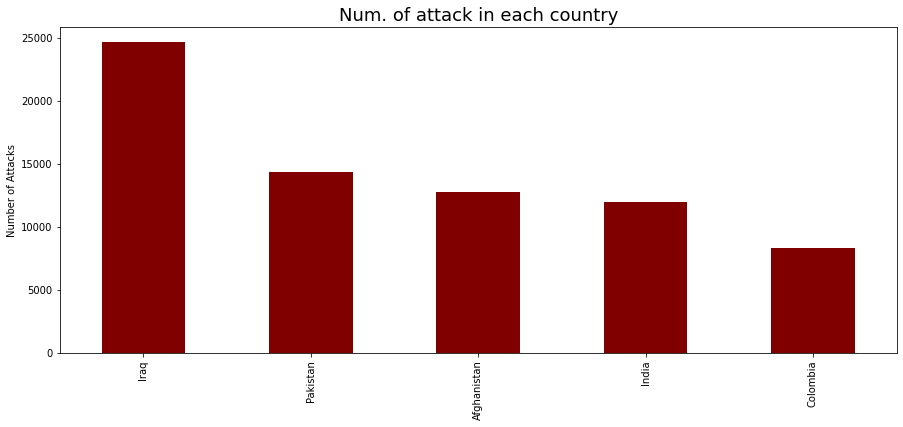

In [28]:
df["Country"].value_counts()[:5].plot(kind="bar",figsize=(15,6),color="#800000")
plt.title('Num. of attack in each country',fontsize=18)
plt.ylabel('Number of Attacks')
plt.show()

# <center><u>Most number of attack and kill by  group

In [15]:
no_null_group = df[df["Group"]!="Unknown"]

In [16]:
# Top 5 Terror group by attack
no_null_group["Group"].value_counts()[:5]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
Name: Group, dtype: int64

Text(0, 0.5, 'Num. of attack')

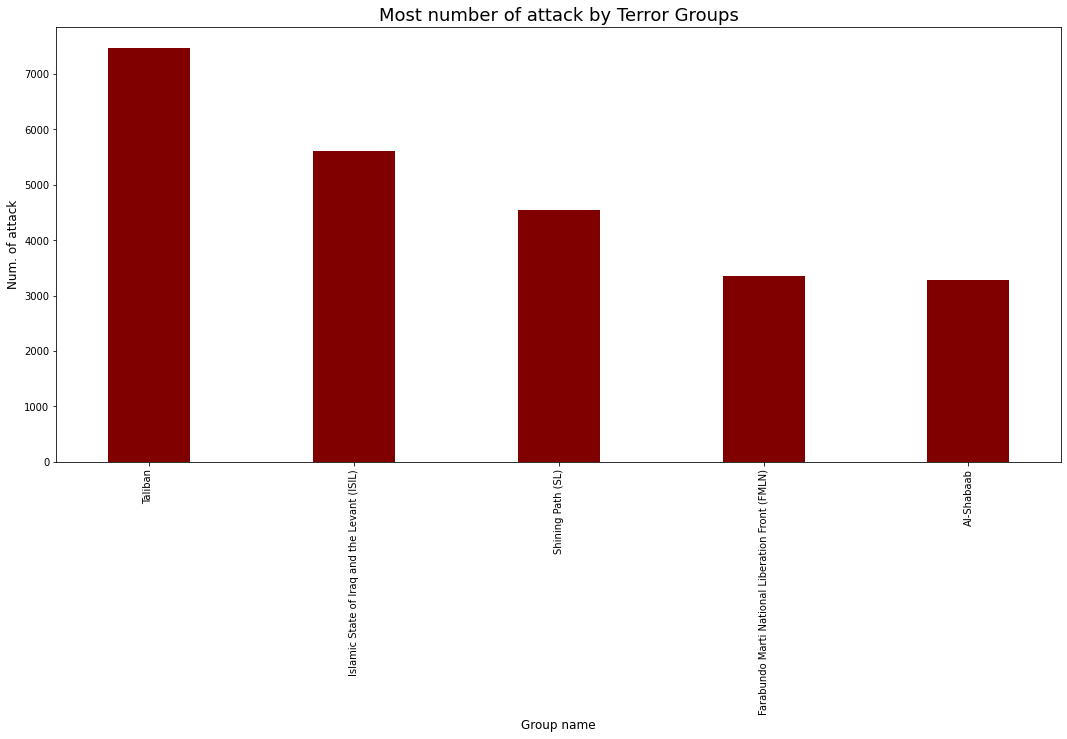

In [17]:
# Top 5 Terror group by attack
no_null_group["Group"].value_counts()[:5].plot(kind="bar",figsize=(18,8),width=.4,color="#800000")
plt.title("Most number of attack by Terror Groups",fontsize=18)
plt.xlabel("Group name",fontsize=12)
plt.ylabel("Num. of attack",fontsize=12)

In [18]:
# Top 5 terror group by kill
no_null_group.groupby("Group")["Killed"].sum().sort_values(ascending=False)[:5]

Group
Islamic State of Iraq and the Levant (ISIL)    38923.0
Taliban                                        29410.0
Boko Haram                                     20328.0
Shining Path (SL)                              11601.0
Liberation Tigers of Tamil Eelam (LTTE)        10989.0
Name: Killed, dtype: float64

Text(0, 0.5, 'Num. of Killed')

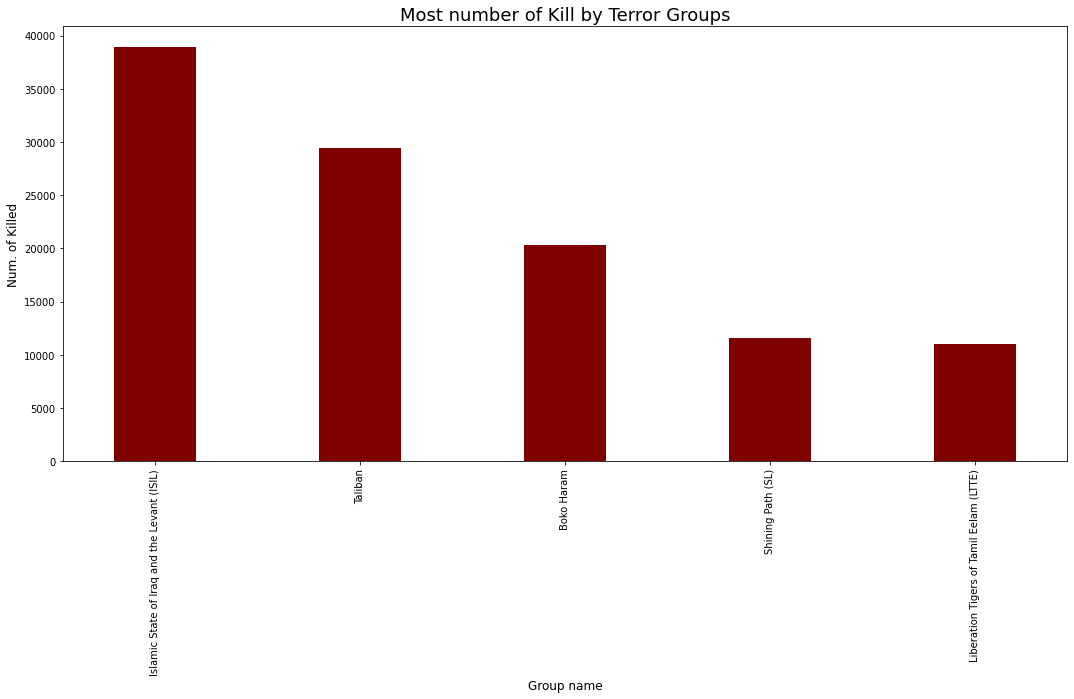

In [19]:
no_null_group.groupby("Group")["Killed"].sum().sort_values(ascending=False)[:5].plot(kind="bar",figsize=(18,8),width=.4,color="#800000")
plt.title("Most number of Kill by Terror Groups",fontsize=18)
plt.xlabel("Group name",fontsize=12)
plt.ylabel("Num. of Killed",fontsize=12)

# <center><u>Methods of attack

In [20]:
df["AttackType"].value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64

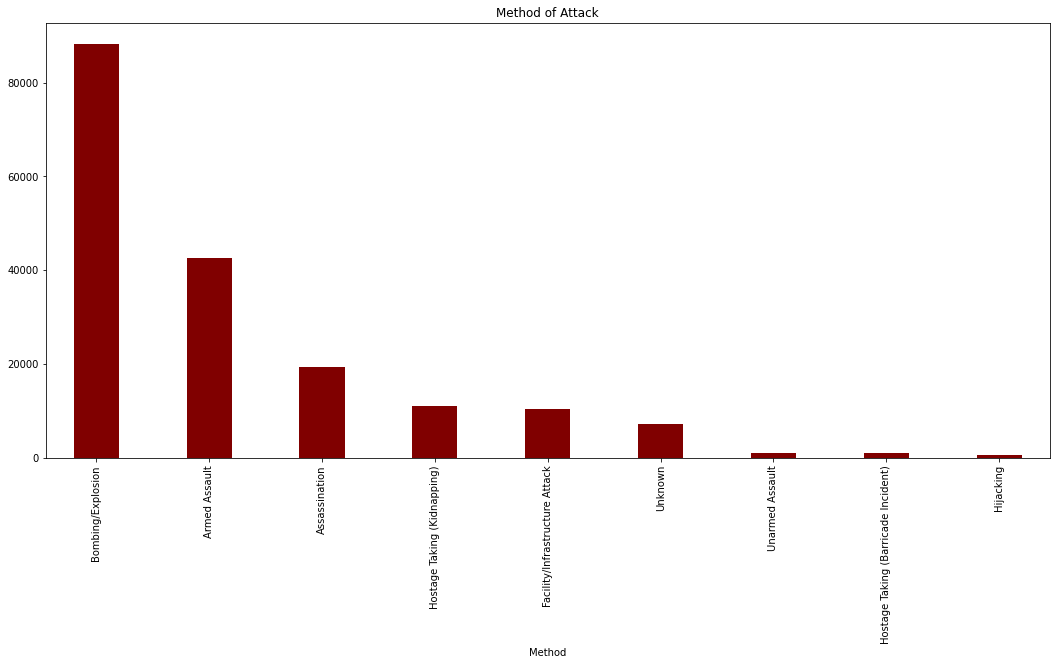

In [21]:
df["AttackType"].value_counts().plot(kind="bar",figsize=(18,8),width=.4,color="#800000")
plt.xlabel('Method')
plt.title('Method of Attack')
plt.show()

# <center><u> Type of target

In [22]:
df["Target_type"].value_counts()[:5]

Private Citizens & Property    43511
Military                       27984
Police                         24506
Government (General)           21283
Business                       20669
Name: Target_type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


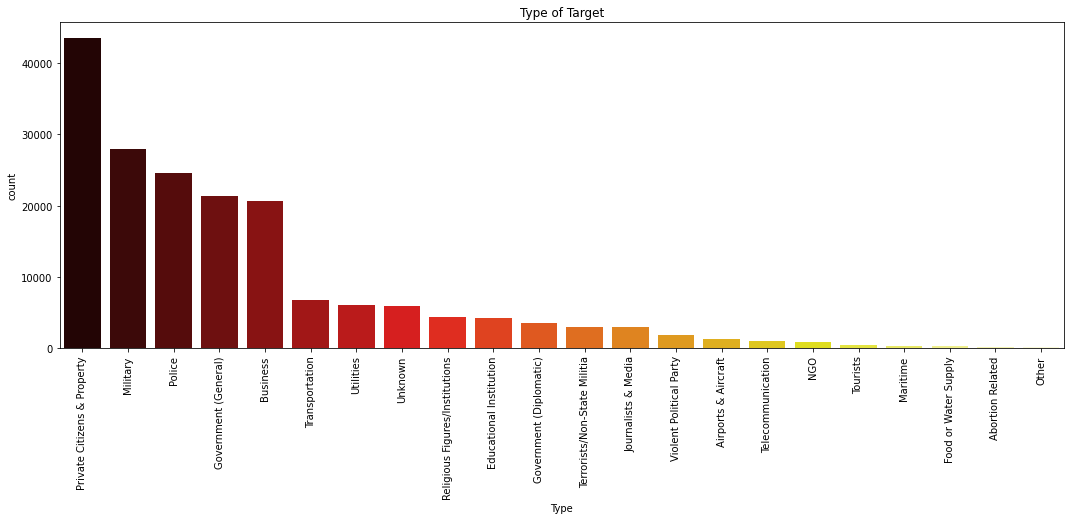

In [23]:
plt.figure(figsize=(18,6))
sns.countplot(df['Target_type'],order=df['Target_type'].value_counts().index,palette='hot') # palette is for color
plt.xticks(rotation=90)
plt.xlabel('Type')
plt.title('Type of Target')
plt.show()

# <center> **The number of casualities corresponding to the killed people in each country for each year.**

In [24]:
px.scatter(df,df.Wounded,df.Killed,hover_name='Country',animation_frame='Year',animation_group='Country',color='AttackType',
           range_color=[0,1],labels={'Killed':'Deaths','Wounded':'Casualities'},
           title='Number of casualities vs Killed people in each country for each year')

# <center> **The total number of attacks in each country using Globe**</center>
### <center> **We will first create a new dataframe which contains the total count of attacks for each country in order to use it as a colour bar.** </center>

In [25]:
terror=df.groupby(['Country'],as_index=False).count()

In [26]:
fig=px.choropleth(terror,locations='Country',locationmode='country names',
                  color='Year',hover_name='Country',projection='orthographic',
                  title='Total number of attacks (1970-2017)',labels={'Year':'Attacks'})
fig.show()